Exponential Smoothing 

**Objective is to forecast stock prices in Q1 2021 with the data from 2020.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 5\stock_price_data.csv')

In [5]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Mar-21,291.02,294.00,294.42,290.26,47.00M,-0.76%
1,30-Mar-21,293.25,294.86,295.72,291.50,38.81M,-0.02%
2,29-Mar-21,293.30,289.72,294.09,289.26,43.68M,0.71%
3,26-Mar-21,291.22,288.63,292.75,288.32,56.07M,1.59%
4,25-Mar-21,286.66,286.50,287.03,283.85,35.22M,0.30%


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      311 non-null    object 
 1   Price     311 non-null    float64
 2   Open      311 non-null    float64
 3   High      311 non-null    float64
 4   Low       311 non-null    float64
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.1+ KB


convert to datetime

In [8]:
# change 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 17.1+ KB


In [10]:
data.min()

Date        2020-01-03 00:00:00
Price                    174.27
Open                      175.0
High                      182.2
Low                      172.15
Vol.                    100.09M
Change %                 -0.01%
dtype: object

sort data in ascending order by date

In [12]:
# data = 
data = data.sort_values(by='Date')

In [13]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
310,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.10%
309,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.43%
308,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
307,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.45%
306,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%


In [14]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [15]:
data = data.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'])

In [16]:
def lineplot(x,y,data_,title_):
    sns.set(rc = {'figure.figsize':(15,8)})
    # Bigger than normal fonts
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x = x, y = y, data = data_)
    chart.set(title=title_)
    plt.show()

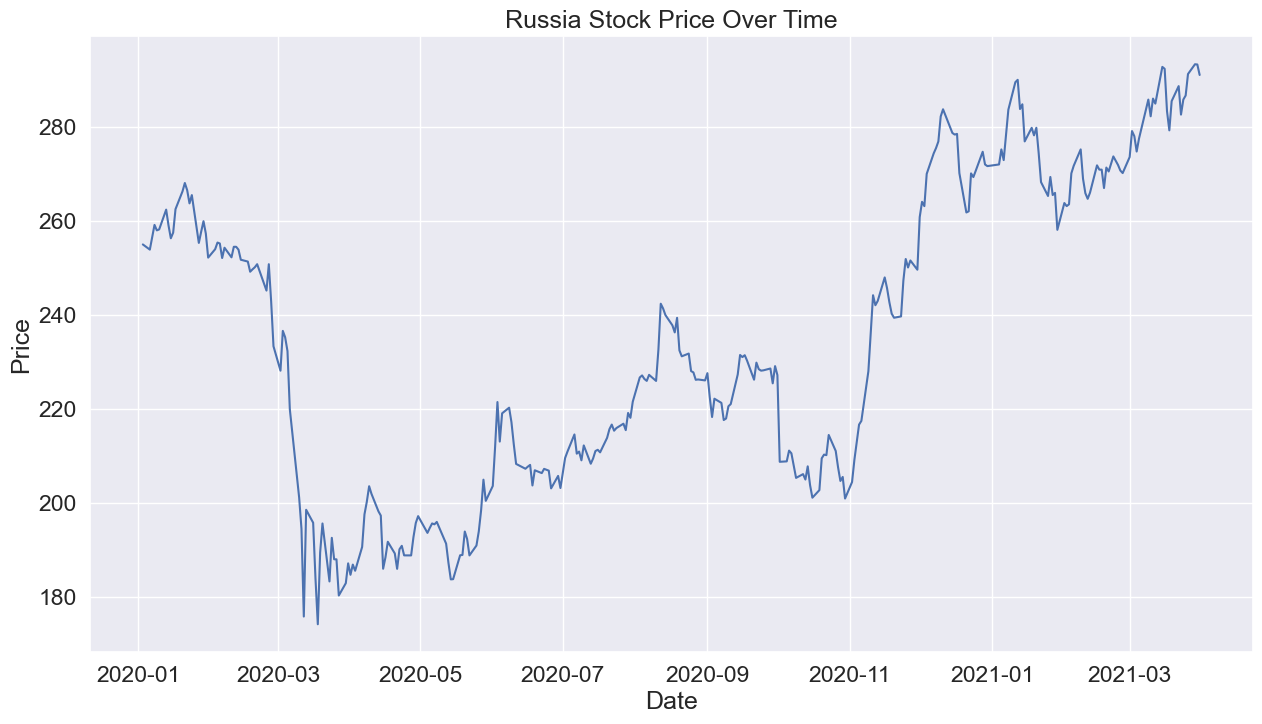

In [17]:
lineplot(x='Date',y='Price',data_=data,title_='Russia Stock Price Over Time')

In [18]:
# **create train_data**
train_data = data[data.Date <= '2020-03-31']

In [19]:
train_data.Date.min()

Timestamp('2020-01-03 00:00:00')

In [20]:
train_data.head()

,Date,Price
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


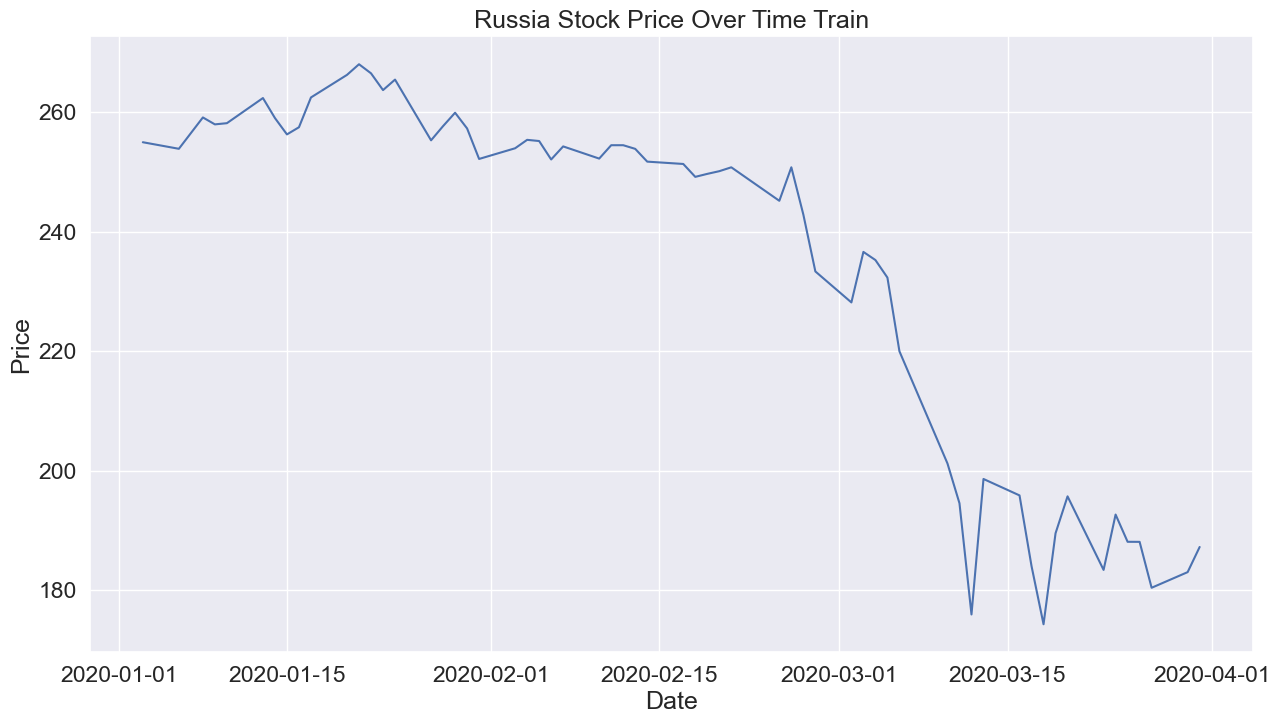

In [21]:
lineplot(x='Date',y='Price',data_=train_data,title_='Russia Stock Price Over Time Train')

In [22]:
# **create test_data**
test_data =data[data.Date > '2020-03-31']

In [23]:
print('min',test_data.Date.min())

min 2020-04-01 00:00:00


In [24]:
print('max  ',test_data.max())
test_data.head()


max   Date     2021-03-31 00:00:00
Price                  293.3
dtype: object


,Date,Price
250,2020-04-01,184.78
249,2020-04-02,186.95
248,2020-04-03,185.64
247,2020-04-06,190.70
246,2020-04-07,197.63


In [25]:
print('min  ',test_data.min())
test_data.head()


min   Date     2020-04-01 00:00:00
Price                 183.81
dtype: object


,Date,Price
250,2020-04-01,184.78
249,2020-04-02,186.95
248,2020-04-03,185.64
247,2020-04-06,190.70
246,2020-04-07,197.63


Simple Exponential Smoothing model 

In [27]:
# # Fit the model using the 'Price' column

# model = ExponentialSmoothing(data['Price'], trend='additive', seasonal=None)
# fit = model.fit()

# # Forecast for the first quarter of 2021

# forecast = fit.forecast(steps=90)  # Assuming 90 days in the first quarter

# # Combine the forecast with the dates for the forecast period

# forecast_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=90, freq='B')
# forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# # Print or plot the forecast

# print(forecast_df)
# forecast_df.plot(x='Date', y='Forecast', title='Stock Price Forecast')

In [43]:
train_data.head()

,Date,Price
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


In [41]:
type(train_data)

pandas.core.frame.DataFrame

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 310 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Price   60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [47]:
train_data.shape

(60, 2)

In [31]:
# Build and fit the Simple Exponential Smoothing model with optimized=True
model = SimpleExpSmoothing(train_data)
fit = model.fit(optimized=True)

# Calculate the number of days in the first quarter of 2021 (January 1 to March 31)
forecast_period = pd.date_range(start='2021-01-01', end='2021-03-31', freq='B')  # 'B' for business days
forecast_steps = len(forecast_period)

# Forecast for the first quarter of 2021
forecast = fit.forecast(steps=forecast_steps)
forecast.index = forecast_period

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Observed')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
def lineplot2 (x, y, hue, data_, title_):
    sns.set(rc={'figure.figsize': (15, 8)})
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x=x, y=y, hue=hue, data=data_)
    chart.set(title=title_)
    plt.show()

# Merge test_data with forecast_df on 'Date'
merged_data = pd.merge(test_data, forecast_df, on='Date', how='outer')
merged_data.head()

In [ ]:
# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(merged_data, id_vars=['Date'], value_vars=['Price', 'Forecast'], 
                      var_name='Type', value_name='Value')

In [ ]:
lineplot2(x='Date', y='Value', hue='Type', data_=melted_data, title_='Stock Price Forecast vs Actual for Q1 2021')

### correct

In [ ]:
# Fit the model using the 'Price' column
model = ExponentialSmoothing(data['Price'], trend='additive', seasonal=None)
fit = model.fit()

# Forecast for the first quarter of 2021
forecast = fit.forecast(steps=90)  # Assuming 90 days in the first quarter

# Combine the forecast with the dates for the forecast period
forecast_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=90, freq='B')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Print or plot the forecast
print(forecast_df)
forecast_df.plot(x='Date', y='Forecast', title='Stock Price Forecast')

In [ ]:
# Merge test_data with forecast_df on 'Date'
merged_data = pd.merge(test_data, forecast_df, on='Date', how='outer')
merged_data.head()

# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(merged_data, id_vars=['Date'], value_vars=['Price', 'Forecast'], 
                      var_name='Type', value_name='Value')

In [ ]:
def lineplot2 (x, y, hue, data_, title_):
    sns.set(rc={'figure.figsize': (15, 8)})
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x=x, y=y, hue=hue, data=data_)
    chart.set(title=title_)
    plt.show()

In [ ]:
lineplot2(x='Date', y='Value', hue='Type', data_=melted_data, title_='Stock Price Forecast vs Actual for Q1 2021')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load stock price data
# Example CSV should have columns: 'Date', 'Close'
data = pd.read_csv('stock_prices.csv', index_col='Date', parse_dates=True)

# Split data into training and test sets
# train_data = data['Close'][:-30]  # Use all data except the last 30 days for training
# test_data = data['Close'][-30:]   # Use the last 30 days for testing

# Build and fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_data)
fit = model.fit(smoothing_level=0.5, optimized=False)

# Forecast for the next 30 periods
forecast = fit.forecast(steps=30)